In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from PIL import Image
import cv2
import os
import glymur
from skimage.measure import compare_ssim,compare_psnr

In [2]:
def show_data(x_in, pre_in):
    mean = np.mean(x_in)
    std = np.std(x_in)
    Max = np.max(x_in)
    Min = np.min(x_in)
    dtype = x_in.dtype
    
    print(pre_in + ' shape: ' + str(x_in.shape) + ' , type: ' + str(dtype) + ' , mean = ' + str(mean) 
          + ' , std = ' + str(std) + ' , Max = ' + str(Max) + ' , Min = ' + str(Min))

In [3]:
def trans_JP2k(data_in, comp_r):
    tmpu8=data_in.astype(np.uint8)
    jp2 = glymur.Jp2k('./test_jp_file.jp2', data=tmpu8, cratios=[comp_r,comp_r-0.0001,comp_r-0.00011])
    size=os.path.getsize("./test_jp_file.jp2")
    #jp2.layer = 0
    rd=jp2[:]
    rdu8=rd.astype(np.uint8)
    return rdu8, size

In [4]:
def kd_fname(i_in):
    rname = '/IMG000' + str(i_in) + '.dib'
    if i_in >9: rname = '/IMG00' + str(i_in) + '.dib'
        
    return rname

In [5]:
def read_KD_img(pref, i_img):
    fname = pref + kd_fname(i_img) 
    tim = cv2.imread(fname)
    npix = tim.shape[0]*tim.shape[1]
    assert(npix == 2048*3072)
    if tim.shape[0]!=2048: tim = np.rot90(tim,k=1)
        
    data_o = np.zeros([2048,3072,3])
    data_o[...,0] = tim[...,2]
    data_o[...,1] = tim[...,1]
    data_o[...,2] = tim[...,0]
    data_o=data_o.astype(np.uint8)
    
    return data_o

In [6]:
def compare_metrics(data0,data1): #data0: label
    #size = len(data0.flatten())*8
    psnr =compare_psnr(data1, data0)
    ssim =compare_ssim(data1, data0, multichannel=True)
    return psnr, ssim

In [7]:
def compare_concise(pref, idx, comp_r):
    img_o = read_KD_img(pref, idx)
    show_data(img_o, '  img_o')
    
    img_j, size_j = trans_JP2k(img_o, comp_r)
    show_data(img_j, '  img_j')
    print('size_j= ' + str(size_j))
    
    psnr, ssim = compare_metrics(img_o,img_j)
    size_o = len(img_o.flatten())
    ratio = float(size_o)/float(size_j)

    print('  psnr= ' + str(psnr) + ' ; ssim= ' + str(ssim))
    print('  size_o= ' + str(size_o))
    print('  ratio= ' + str(ratio))
    
    plt.figure(figsize=(16, 18))

    plt.subplot(1,2,1)
    plt.imshow(img_o)
    
    plt.subplot(1,2,2)    
    plt.imshow(img_j)
    plt.title('PSNR= %.2f, SSIM= %.4f'%(psnr,ssim))
    plt.show()

In [8]:
pref = '../Kodak_examples_uncompressed'

## 1

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 107.22540447447035 , std = 55.913334017900524 , Max = 255 , Min = 0
size_j= 73835
  psnr= 33.020788366400026 ; ssim= 0.8482117626551409
  size_o= 18874368
  ratio= 255.62901063181417


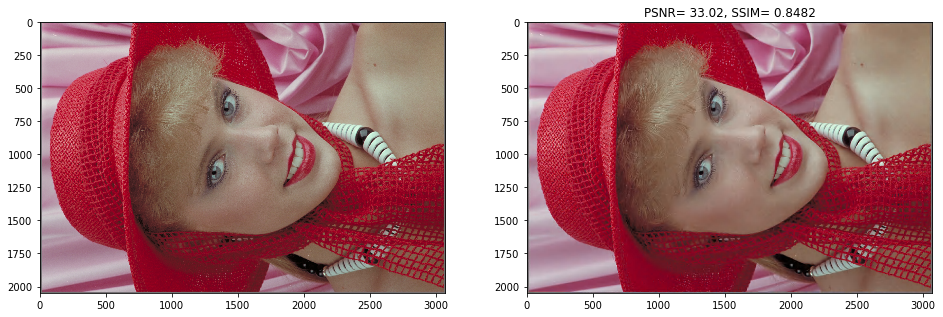

In [9]:
compare_concise(pref, 1, 256)

In [10]:
ratio_ar = 256/((0.7227+0.7684+0.6709)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 355.22664199814983


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 107.32763957977295 , std = 55.838989395552424 , Max = 255 , Min = 0
size_j= 53123
  psnr= 32.18843898154664 ; ssim= 0.8297122923079535
  size_o= 18874368
  ratio= 355.295597010711


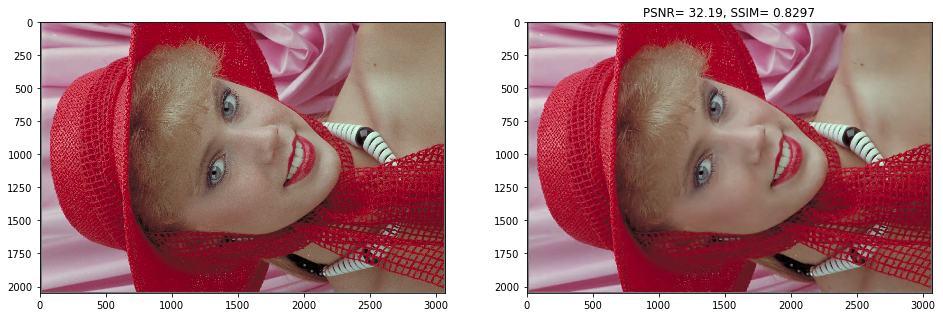

In [11]:
compare_concise(pref, 1, 356)

## 2

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 120.00524404313829 , std = 46.29589457219886 , Max = 255 , Min = 0
size_j= 73774
  psnr= 31.932767123974514 ; ssim= 0.8156756676713632
  size_o= 18874368
  ratio= 255.84037736872068


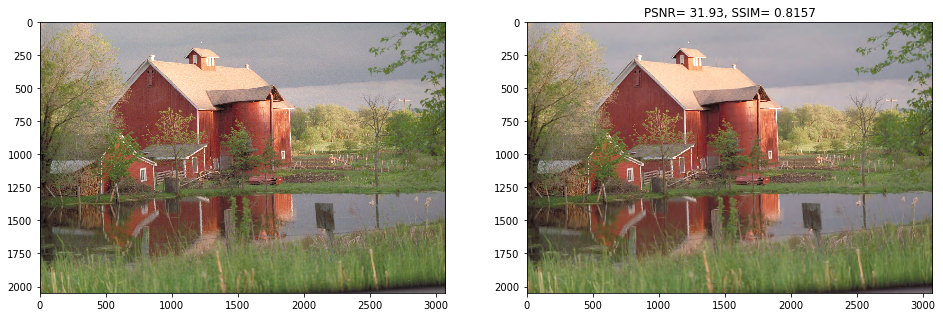

In [12]:
compare_concise(pref, 2, 256)

In [13]:
ratio_ar = 256/((0.7012+0.72241+0.7137)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 359.3301860750195


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 120.1649063428243 , std = 46.13435102398272 , Max = 255 , Min = 0
size_j= 52636
  psnr= 31.113286346721946 ; ssim= 0.7918298648650323
  size_o= 18874368
  ratio= 358.58287103883276


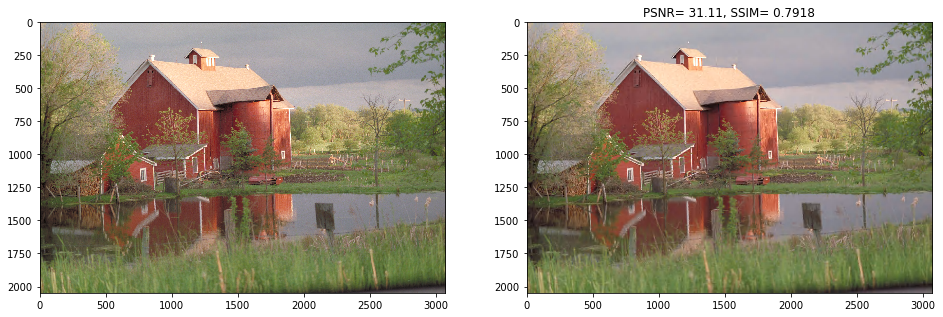

In [14]:
compare_concise(pref, 2, 359)

## 3

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 109.74815495808919 , std = 55.75697504065841 , Max = 255 , Min = 0
size_j= 73771
  psnr= 36.949389741042346 ; ssim= 0.9048422323367115
  size_o= 18874368
  ratio= 255.8507814723943


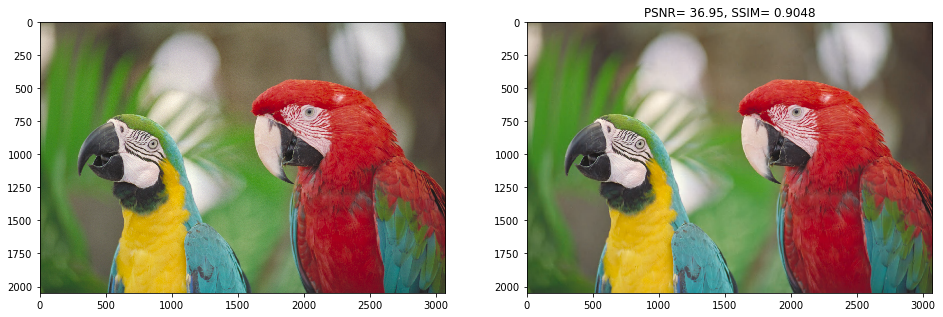

In [15]:
compare_concise(pref, 3, 256)

In [16]:
ratio_ar = 256/((0.71427+0.7669+0.73636)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 346.3312784945412


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 109.85657564798991 , std = 55.733984630664025 , Max = 255 , Min = 0
size_j= 54481
  psnr= 36.388641600720504 ; ssim= 0.8990897233941485
  size_o= 18874368
  ratio= 346.4394559571227


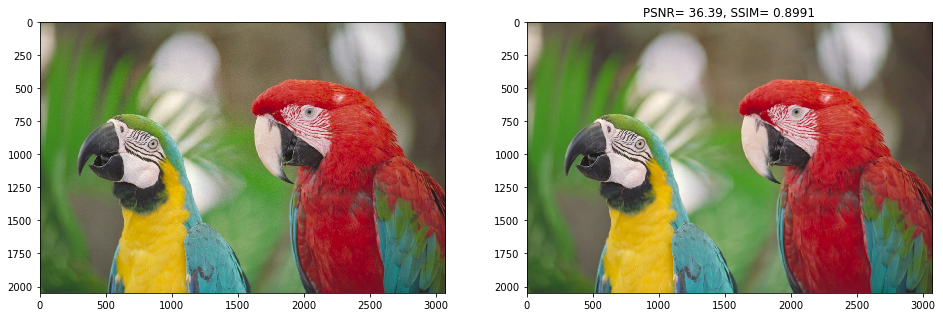

In [17]:
compare_concise(pref, 3, 347)